In [1]:

import sys
sys.path.append('../codes')

In [2]:
import torch
import numpy as np
import pandas as pd
from torch  import nn
from sklearn.preprocessing import OneHotEncoder

In [3]:
%load_ext autoreload
%autoreload 2
import networks
import utils
import config
import loss
import trainer
import pickle
import evaluator
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import config
import matplotlib.pyplot as plt

In [4]:
tr_loader = utils.create_dataloader_by_env_avg(config.training_data)

In [5]:
validation_loader = utils.create_dataloader_by_env_avg(config.validation_data, 
                                                        is_training=False)

In [6]:
# utils.dump_pickle(tr_loader.dataset.weather_scaler, config.weather_scaler_path)
# utils.dump_pickle(tr_loader.dataset.target_scaler, config.target_scaler_path)

In [7]:
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:1


In [8]:
tr_loader.dataset.data.shape

(1160, 81)

In [9]:
num_geno = tr_loader.dataset.data.shape[1]
model = networks.fc_avg_net_over_geno(num_features = tr_loader.dataset.data.shape[1], hidden_dim=54)

In [10]:
criterion = nn.MSELoss()

In [11]:
output = trainer.train_model_by_avg(model, tr_loader, validation_loader, criterion, config.model_avg_by_env_path)

Current epoch: 8200 Best epoch 8184
Training Loss: 2.510626019658269, training PCC: 0.641324597172605
Validation Loss: 2.242359434857088, validation PCC: 0.7786502584369452

Current epoch: 8201 Best epoch 8184
Training Loss: 2.3281839538264917, training PCC: 0.6686737741527264
Validation Loss: 2.2317316900281345, validation PCC: 0.7780197636309492

Current epoch: 8202 Best epoch 8184
Training Loss: 2.485971064180941, training PCC: 0.6511610342671336
Validation Loss: 2.2370697926072514, validation PCC: 0.7780482490286965

Current epoch: 8203 Best epoch 8184
Training Loss: 2.430436102119652, training PCC: 0.6641143925051667
Validation Loss: 2.250272487892824, validation PCC: 0.7789370442205796

Current epoch: 8204 Best epoch 8184
Training Loss: 2.341665267944336, training PCC: 0.6658862891832438
Validation Loss: 2.212376792641247, validation PCC: 0.7781030370565056

Current epoch: 8205 Best epoch 8184
Training Loss: 2.4394170061962024, training PCC: 0.6582265311889681
Validation Loss: 2.

In [12]:
tr_loss, val_loss, tr_pccs, val_pccs = output

df = pd.DataFrame({
    'epochs': list(range(len(tr_loss))) * 2,
    'loss': list(tr_loss) + list(val_loss),
    'type': ['training'] * len(tr_loss) + ['validation'] * len(val_loss),
    'pcc': np.array(tr_pccs + val_pccs)
})

df.to_pickle('../outputs/avg_by_env_training_outputs_' + config.version + '.pkl')

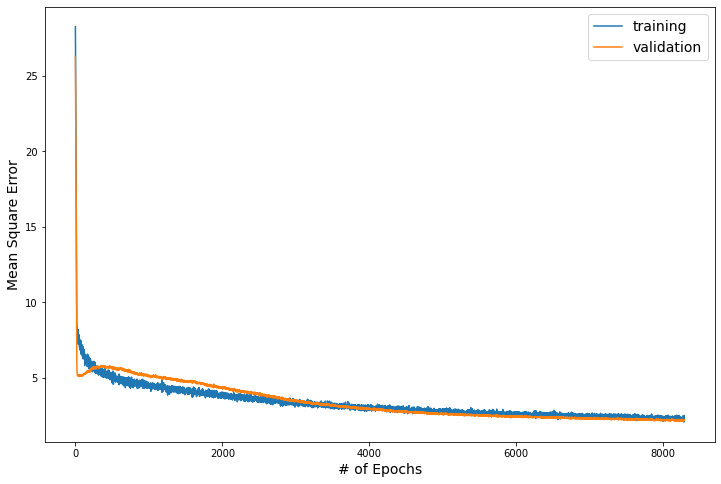

In [13]:
plt.figure(figsize = (12,8))
ax = sns.lineplot(data=df, x="epochs", y="loss", hue="type")
ax.set_xlabel("# of Epochs", fontsize = 14)
ax.set_ylabel("Mean Square Error", fontsize = 14)
ax.legend(fontsize=14)
fig = ax.get_figure()
fig.savefig('../figures/loss_' + config.version + '.jpeg', dpi=256 )


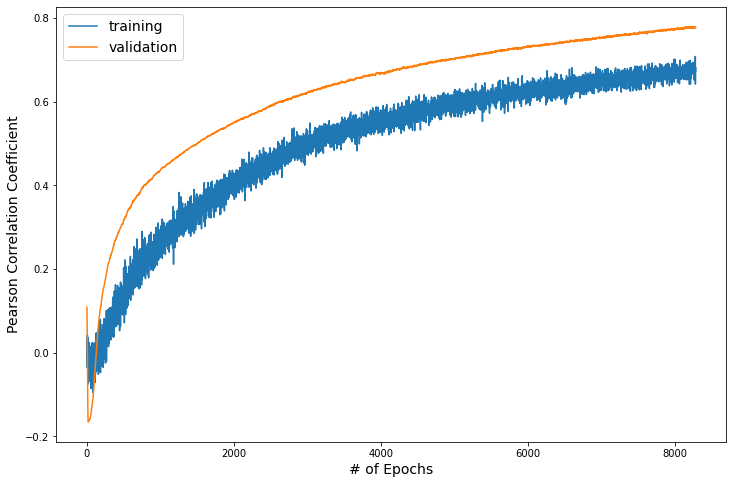

In [14]:
plt.figure(figsize = (12,8))
ax = sns.lineplot(data=df, x="epochs", y="pcc", hue="type")
fig = ax.get_figure()
ax.set_xlabel("# of Epochs", fontsize = 14)
ax.set_ylabel("Pearson Correlation Coefficient", fontsize = 14)
ax.legend(fontsize=14)
fig.savefig('../figures/pcc_' + config.version + '.jpeg', dpi=256)

In [15]:
print(config.version)

v1
